# Gömda Lager - Att Böja Rymden

Vi har sett att en perceptron, oavsett hur många vi lägger bredvid varandra, inte kan lösa XOR. Problemet är att varje perceptron bara kan skapa en rak linje.

**Lösningen:** Istället för att lägga neuroner *bredvid* varandra, ska vi lägga dem *efter* varandra. Detta skapar vad vi kallar **gömda lager** (hidden layers).

## Neurala Nätverk

Några få forskare vägrade ge upp efter Minsky och Paperts kritik. De insåg att problemet inte var neuronen i sig, utan att man bara använde _en_. Våra hjärnor har miljarder neuroner. Vad skulle hända om man, precis som i hjärnan, kopplade ihop massor av dem i lager?

Ett neuralt nätverk består vanligtvis av tre typer av lager:

- **Input-lager:** Tar emot den initiala datan. Varje neuron representerar en del av datan (t.ex. en pixel i en bild).
- **Dolda lager (Hidden Layers):** Ett eller flera mellanliggande lager. Här sker det verkliga "tänkandet". Magin ligger i att varje lager lär sig att känna igen mönster från det föregående lagret, vilket skapar en hierarki av kunskap.
- **Output-lager:** Producerar det slutgiltiga svaret (t.ex. "Detta är en bild på en katt").

### Steg för steg: Hur ett nätverk lär sig känna igen siffran "4"

Låt oss följa datan genom ett enkelt nätverk som ska känna igen handskrivna siffror. Input är en liten bild, 28x28 pixlar, av siffran "4".

**Steg 1: Input-lagret**
Nätverket har 784 neuroner i sitt input-lager (28 × 28 = 784). Varje neuron tar emot värdet från en enda pixel – kanske `1` för en svart pixel och `0` för en vit. Detta lager "ser" bara en massa osammanhängande punkter.

**Steg 2: Första Dolda Lagret – Hitta enkla former**
Neuronerna i detta lager får sina inputs från _alla_ neuroner i input-lagret. Genom träning har de specialiserat sig.

- **Neuron A** kanske har lärt sig att "avfyra" starkt när den ser en kort, vertikal linje i det övre vänstra hörnet.
- **Neuron B** har lärt sig att känna igen en horisontell linje i mitten.
- **Neuron C** har lärt sig att känna igen en lång, vertikal linje till höger.

När bilden av en "4" matas in, kommer Neuron A, B och C alla att avfyra starkt. Outputen från detta lager är inte längre pixlar, utan _koncept_: "ja, det finns en vertikal linje här", "ja, det finns en horisontell linje där".

**Steg 3: Output-lagret – Kombinera formerna**
- **"Fyra"-neuronen** har lärt sig att den ska avfyra om den får starka signaler från neuronerna som känner igen "kort vertikal linje uppe till vänster", "horisontell linje i mitten" OCH "lång vertikal linje till höger".
- **"Etta"-neuronen** har lärt sig att den bara behöver en stark signal från Neuron C (lång vertikal linje).

Eftersom bilden av en "4" aktiverade A, B och C, kommer "Fyra"-neuronen att få en mycket hög summerad input och avfyra med högsta sannolikhet.

## Varför fungerar gömda lager?

Tricket med gömda lager är att de **transformerar datan**.

XOR är inte linjärt separerbar i det ursprungliga 2D-rummet. Men om vi låter ett första lager av neuroner transformera datan till ett nytt rum, kan problemet bli linjärt separerbart där!

Tänk dig det så här:
1. Input: `[0,0], [0,1], [1,0], [1,1]` - fyra punkter som inte kan separeras med en linje
2. Efter gömt lager: Punkterna har flyttats till nya positioner
3. I det nya rummet: Nu KAN de separeras med en linje!

In [3]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

## Logiska grindar och XOR

Innan vi bygger ett lärande nätverk, låt oss förstå hur XOR kan lösas med logiska grindar.

### NAND och NOR - Universella grindar

Visserligen kan en perceptron inte modellera XOR. Men vi kan enkelt modellera NAND eller NOR:

| x1 | x2 | NAND | NOR |
|----|----|------|-----|
| 0  | 0  | 1    | 1   |
| 0  | 1  | 1    | 0   |
| 1  | 0  | 1    | 0   |
| 1  | 1  | 0    | 0   |

Det spännande med NAND och NOR är att de kan användas för att bygga **vilken logisk funktion som helst**. Det betyder att om vi kombinerar flera perceptroner, kan vi representera XOR!

### XOR som kombination av grindar

XOR kan uttryckas som:

```
XOR(x1, x2) = AND(OR(x1, x2), NAND(x1, x2))
```

Eller med ord: "Antingen x1 eller x2 är sant, men inte båda samtidigt."

Detta kräver tre operationer:
1. OR: Är minst en av dem sann?
2. NAND: Är det INTE så att båda är sanna?
3. AND: Är både OR och NAND sanna?

Vi behöver alltså tre neuroner som samarbetar!

---

## Övning 6: XOR med gömda lager

I denna övning får du bygga ett XOR-nätverk med manuellt inställda vikter.

Nätverket har 3 neuroner:
- `nand_neuron`: Beräknar NAND(x1, x2)
- `or_neuron`: Beräknar OR(x1, x2)
- `and_neuron`: Beräknar AND av de två tidigare neuronernas output

**Din uppgift:** Fyll i `predict`-metoden så att nätverket korrekt beräknar XOR.

In [4]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def predict(self, inputs):
        total = np.dot(inputs, self.weights) + self.bias
        return 1 if total > 0 else 0


class XORNetwork:
    def __init__(self):
        # Dessa vikter är förprogrammerade för att ge rätt svar
        self.nand_neuron = Neuron(weights=[-0.5, -0.5], bias=0.75)
        self.or_neuron = Neuron(weights=[0.5, 0.5], bias=-0.25)
        self.and_neuron = Neuron(weights=[0.5, 0.5], bias=-0.75)

    def predict(self, inputs):
        # TODO: Använd neuronerna på ett smart sätt för att beräkna XOR
        # Tips: XOR = AND(OR(x1, x2), NAND(x1, x2))
        #
        # Steg 1: Beräkna OR av inputs
        # Steg 2: Beräkna NAND av inputs
        # Steg 3: Beräkna AND av de två resultaten
        
        or_result = self.or_neuron.predict(inputs)
        nand_result = self.nand_neuron.predict(inputs)
        
        # AND-neuronen tar de två mellanresultaten som input
        final_result = self.and_neuron.predict([or_result, nand_result])
        
        return final_result

In [5]:
# Testa nätverket
print("--- Test av XOR-nätverk ---")
xor_inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
xor_targets = [0, 1, 1, 0]

network = XORNetwork()

correct = 0
for input_data, target in zip(xor_inputs, xor_targets):
    prediction = network.predict(input_data)
    status = "✓" if prediction == target else "✗"
    if prediction == target:
        correct += 1
    print(f"Input: {input_data}, Facit: {target}, Prediktion: {prediction} {status}")

print(f"\nNoggrannhet: {correct}/4")

--- Test av XOR-nätverk ---
Input: [0, 0], Facit: 0, Prediktion: 0 ✓
Input: [0, 1], Facit: 1, Prediktion: 1 ✓
Input: [1, 0], Facit: 1, Prediktion: 1 ✓
Input: [1, 1], Facit: 0, Prediktion: 0 ✓

Noggrannhet: 4/4


### Visualisera nätverket

Låt oss se vad som händer i varje steg:

In [6]:
print("\n--- Steg-för-steg genom nätverket ---")
print("\n| Input | OR | NAND | AND (XOR) |")
print("|-------|----|------|-----------|")

for inputs in xor_inputs:
    or_out = network.or_neuron.predict(inputs)
    nand_out = network.nand_neuron.predict(inputs)
    final = network.and_neuron.predict([or_out, nand_out])
    print(f"| {inputs} | {or_out}  | {nand_out}    | {final}         |")


--- Steg-för-steg genom nätverket ---

| Input | OR | NAND | AND (XOR) |
|-------|----|------|-----------|
| [0, 0] | 0  | 1    | 0         |
| [0, 1] | 1  | 1    | 1         |
| [1, 0] | 1  | 1    | 1         |
| [1, 1] | 1  | 0    | 0         |


### Visualisera transformationen

Det dolda lagret (OR och NAND) transformerar input-rummet till ett nytt rum där XOR blir linjärt separerbart:

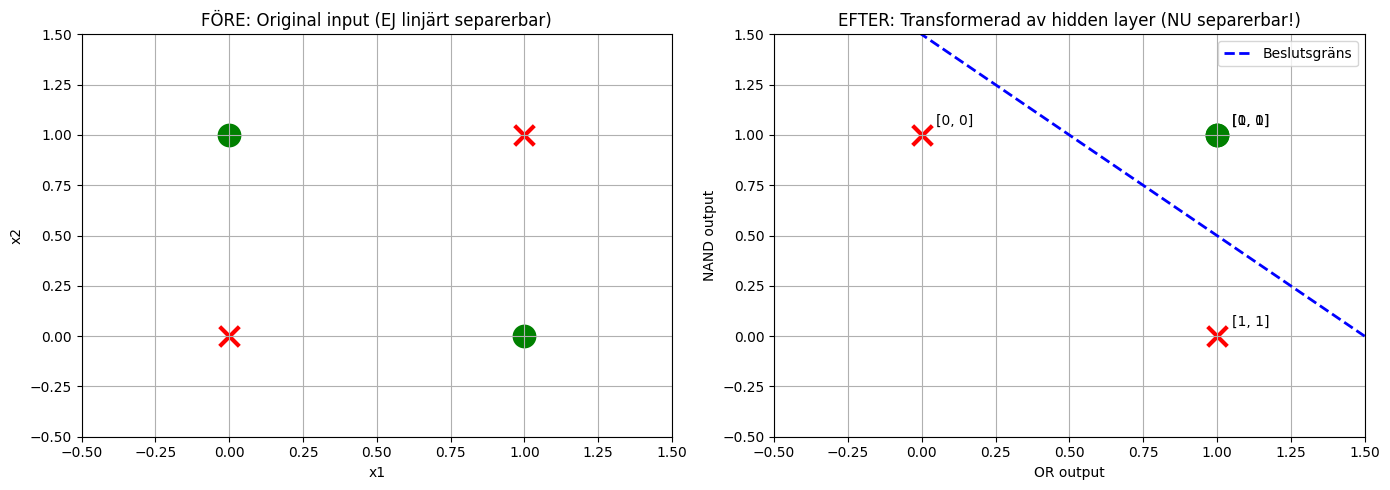

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Vänster: Original XOR-data (inte separerbar)
ax1 = axes[0]
for i, (x, y) in enumerate(xor_inputs):
    color = 'green' if xor_targets[i] == 1 else 'red'
    marker = 'o' if xor_targets[i] == 1 else 'x'
    ax1.scatter(x, y, c=color, s=200, marker=marker, linewidths=3)

ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('FÖRE: Original input (EJ linjärt separerbar)')
ax1.grid(True)

# Höger: Transformerad data (separerbar!)
ax2 = axes[1]
for i, inputs in enumerate(xor_inputs):
    or_out = network.or_neuron.predict(inputs)
    nand_out = network.nand_neuron.predict(inputs)
    color = 'green' if xor_targets[i] == 1 else 'red'
    marker = 'o' if xor_targets[i] == 1 else 'x'
    ax2.scatter(or_out, nand_out, c=color, s=200, marker=marker, linewidths=3)
    ax2.annotate(f'{inputs}', (or_out + 0.05, nand_out + 0.05))

# Rita separationslinje
x_line = np.linspace(-0.5, 1.5, 100)
# AND-neuronen: 0.5*x + 0.5*y - 0.75 = 0  =>  y = 1.5 - x
ax2.plot(x_line, 1.5 - x_line, 'b--', linewidth=2, label='Beslutsgräns')

ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_xlabel('OR output')
ax2.set_ylabel('NAND output')
ax2.set_title('EFTER: Transformerad av hidden layer (NU separerbar!)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

**Magin har hänt!**

Det dolda lagret (OR och NAND-neuronerna) har transformerat de fyra punkterna till nya positioner. I det nya "OR-NAND-rummet" är de gröna punkterna (XOR = 1) separerade från de röda (XOR = 0) av en rak linje!

Detta är kärnan i vad gömda lager gör: de skapar nya representationer av datan där problemet blir enklare.

---

## Problemet: Hur hittar vi vikterna?

I övningen ovan programmerade vi vikterna för hand. Vi visste att:
- OR behöver vikter `[0.5, 0.5]` och bias `-0.25`
- NAND behöver vikter `[-0.5, -0.5]` och bias `0.75`
- AND behöver vikter `[0.5, 0.5]` och bias `-0.75`

Men hur hittade vi dessa värden? Vi räknade ut dem för hand eftersom vi visste vad vi ville uppnå.

**Det stora problemet:** När vi har tusentals neuroner och miljontals vikter, kan vi inte räkna ut dem för hand. Vi behöver ett sätt för nätverket att **lära sig vikterna självt**.

### The Credit Assignment Problem

När nätverket gissar fel, vilka vikter ska vi ändra? Om output-neuronen säger "fel!", hur vet neuronerna i det dolda lagret om de bidrog till felet eller inte?

Detta kallas **"The Credit Assignment Problem"** (ungefär "problemet med att fördela beröm och skuld").

**Lösningen:** Backpropagation - en algoritm som skickar felet bakåt genom nätverket och berättar för varje neuron hur mycket den bidrog till det totala felet.

---

## Vad har vi lärt oss?

I denna notebook har vi:

1. Förstått varför **gömda lager** behövs för att lösa icke-linjära problem
2. Sett hur gömda lager **transformerar datan** till ett nytt rum
3. Byggt ett XOR-nätverk med **manuellt inställda vikter**
4. Visualiserat hur transformationen gör XOR **linjärt separerbart**
5. Identifierat nästa problem: **Hur hittar vi vikterna automatiskt?**

## Nästa steg

I nästa notebook lär vi oss **Backpropagation** - algoritmen som låter neurala nätverk lära sig sina egna vikter genom att propagera felet bakåt genom nätverket.